# 2. Centrality

How “important” a node is to a network (or, as is often really of interest for us, a social system) depends very much on what we take “importance” to mean in the particular network and context of study. A plethora of measures of “centrality” have been deﬁned over the years to capture different aspects of “importance,” and we’ll go over some of the most common and useful measures. When it comes to your own projects, think carefully about what type(s) of centrality measures will capture something meaningful about the locations and processes that you are interested in.

In R, there is data on friends network in Dixon high school, however, it is not available through Python. We use data on Les Miserables characters instead.

In [18]:
# Install the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [38]:
# Load the data
G = nx.les_miserables_graph()
print(G)

Graph with 77 nodes and 254 edges


In [39]:
# Look variables in the data
print(G.nodes())
print(G.edges())

['Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']
[('Napoleon', 'My

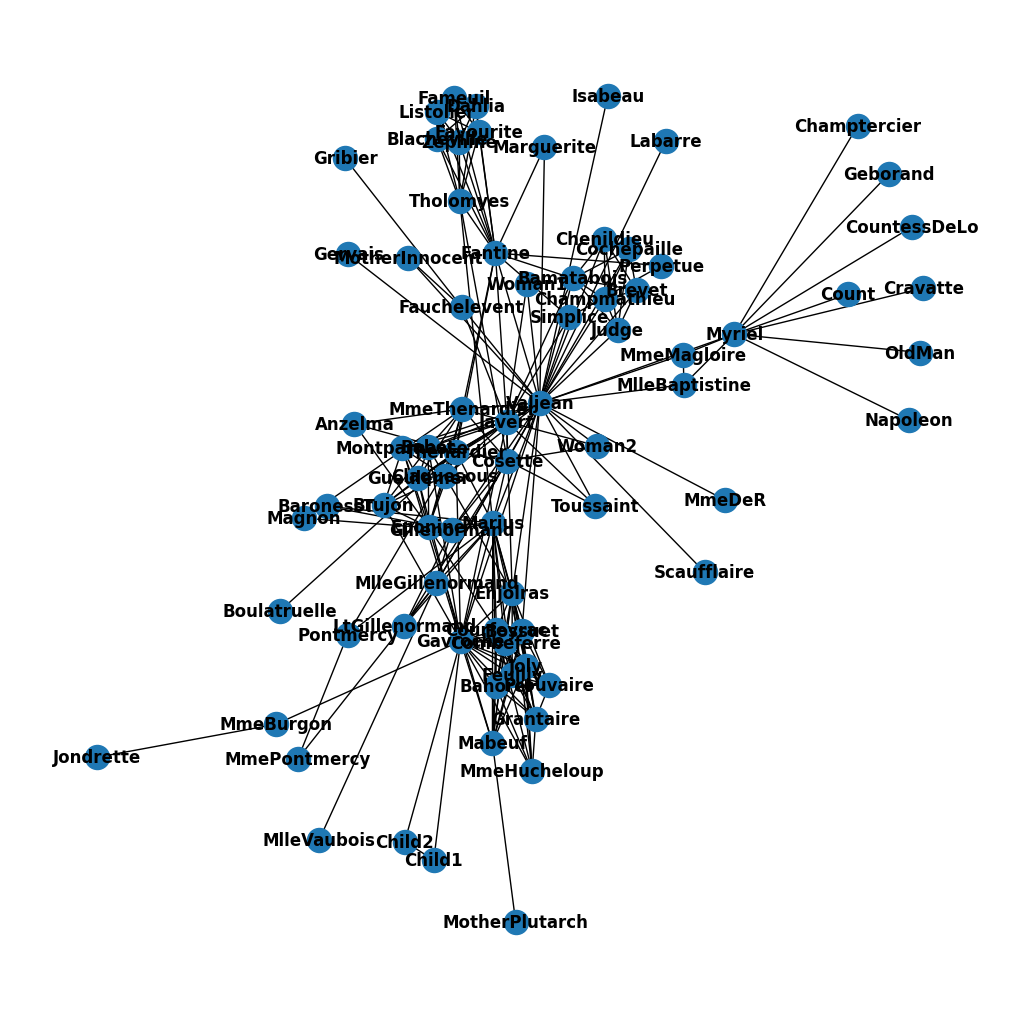

In [40]:
# Visualise the network
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

## Calculating centrality measures

### Degree centrality
Let’s start with degree centrality. Recall that degree centrality refers to the number of connections a node has, and that it can further be broken down into in-degree and out-degree for directed networks, counting the number of edges pointing to the node (in-degree) or the number of edges originating from the node (out-degree).

In [44]:
# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Summarise the degree centrality
degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=['node', 'degree_centrality'])
print(degree_centrality_df.sort_values('degree_centrality', ascending=False))
print(degree_centrality_df.describe())


           node  degree_centrality
10      Valjean           0.473684
48     Gavroche           0.289474
55       Marius           0.250000
27       Javert           0.223684
25   Thenardier           0.210526
..          ...                ...
13       MmeDeR           0.013158
14      Isabeau           0.013158
15      Gervais           0.013158
32  Scaufflaire           0.013158
0      Napoleon           0.013158

[77 rows x 2 columns]
       degree_centrality
count          77.000000
mean            0.086808
std             0.079473
min             0.013158
25%             0.026316
50%             0.078947
75%             0.131579
max             0.473684


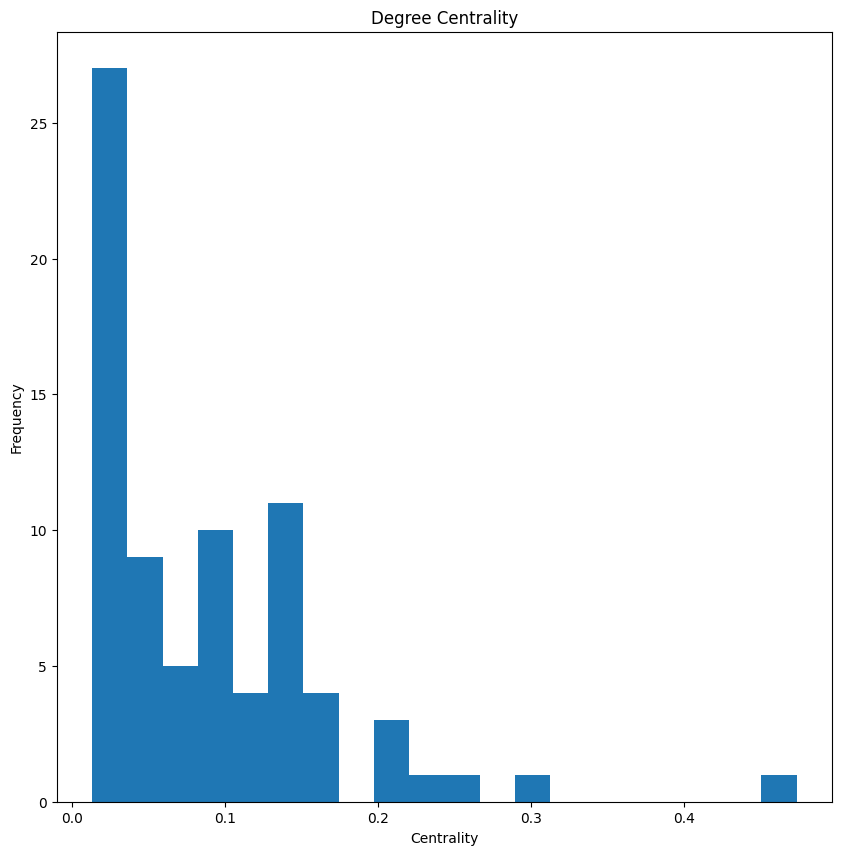

In [45]:
# Plot the degree centrality of each node
plt.figure(figsize=(10, 10))
plt.hist(list(degree_centrality.values()), bins=20)
plt.title('Degree Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

### Eigenvector Centrality and PageRank Centrality

Eigenvector centrality and PageRank centrality are two closely related measures, as you’ll recall. Both try to capture not just the number of connections a node has, but also the importance of those nodes.

Eigenvector centrality is really intended for undirected networks, so we can calculate it here, but it may give us a warning, and really we should focus more on PageRank in this case, as it will be better suited to this directed network. Unlike the other measures, the output from these two functions includes multiple elements, so we want to select just the vector of centrality values, which we can get with $vector.

In [47]:
# Calculate the eigenvector centrality of each node
eigenvector_centrality = nx.eigenvector_centrality(G)

# Summarise the eigenvector centrality
eigenvector_centrality_df = pd.DataFrame(list(eigenvector_centrality.items()), columns=['node', 'eigenvector_centrality'])
print(eigenvector_centrality_df.sort_values('eigenvector_centrality', ascending=False))
print(eigenvector_centrality_df.describe())

            node  eigenvector_centrality
48      Gavroche                0.317839
10       Valjean                0.267618
58      Enjolras                0.267179
55        Marius                0.259111
64       Bossuet                0.242131
..           ...                     ...
6   Champtercier                0.002343
7       Cravatte                0.002343
8          Count                0.002343
9         OldMan                0.002343
47     Jondrette                0.002220

[77 rows x 2 columns]
       eigenvector_centrality
count               77.000000
mean                 0.078030
std                  0.083601
min                  0.002220
25%                  0.019686
50%                  0.040049
75%                  0.140711
max                  0.317839


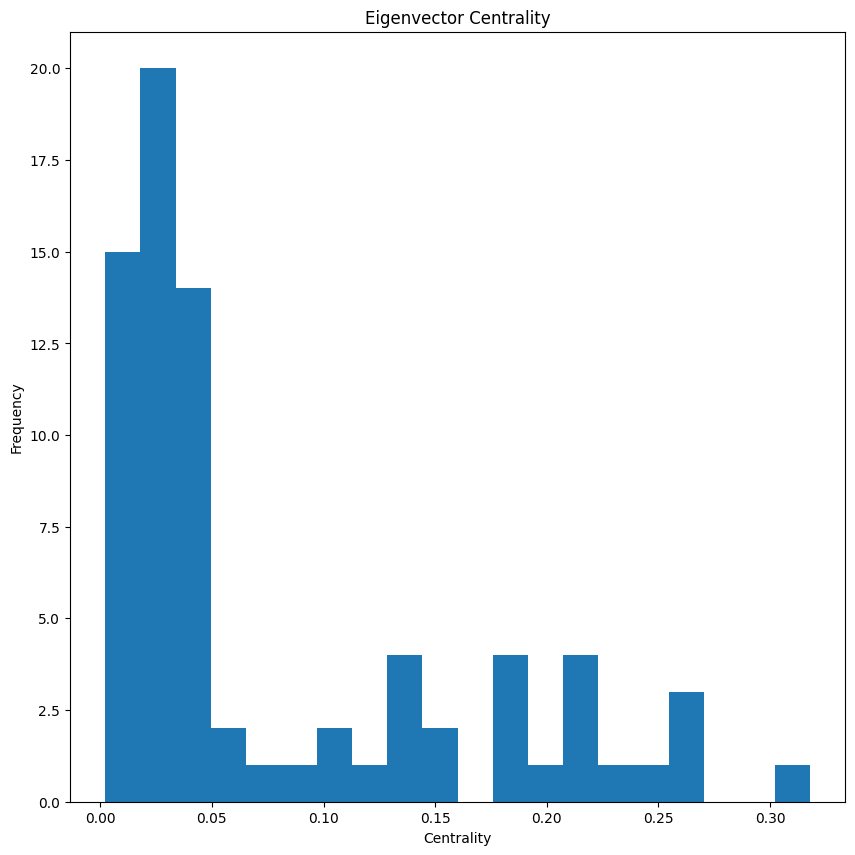

In [46]:
# Plot the eigenvector centrality of each node
plt.figure(figsize=(10, 10))
plt.hist(list(eigenvector_centrality.values()), bins=20)
plt.title('Eigenvector Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Calculate the PageRank centrality of each node
pagerank_centrality = nx.pagerank(G)

# Summarise the PageRank centrality
pagerank_centrality_df = pd.DataFrame(list(pagerank_centrality.items()), columns=['node', 'pagerank_centrality'])
print(pagerank_centrality_df.sort_values('pagerank_centrality', ascending=False))
print(pagerank_centrality_df.describe())

            node  pagerank_centrality
10       Valjean             0.099576
55        Marius             0.051666
1         Myriel             0.039251
26       Cosette             0.036914
58      Enjolras             0.036602
..           ...                  ...
13        MmeDeR             0.002484
14       Isabeau             0.002484
32   Scaufflaire             0.002484
15       Gervais             0.002484
40  Boulatruelle             0.002445

[77 rows x 2 columns]
       pagerank_centrality
count            77.000000
mean              0.012987
std               0.014532
min               0.002445
25%               0.003614
50%               0.008917
75%               0.015701
max               0.099576


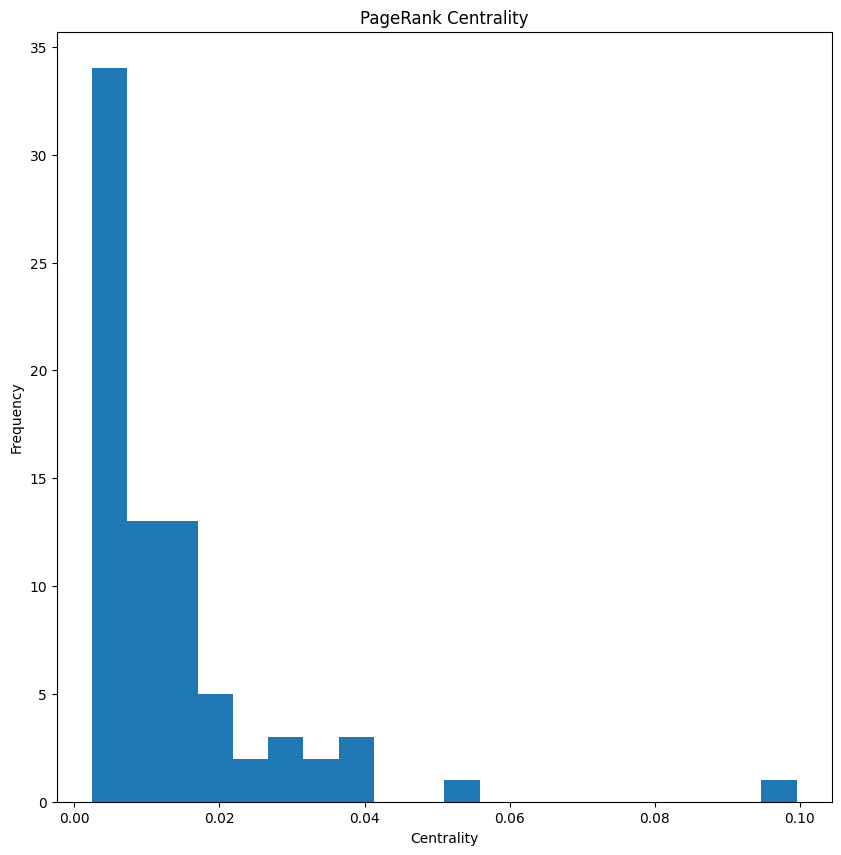

In [49]:
# Plot the PageRank centrality of each node
plt.figure(figsize=(10, 10))
plt.hist(list(pagerank_centrality.values()), bins=20)
plt.title('PageRank Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

### Closeness Centrality
Closeness captures a very diﬀerent type of centrality. It is a measure of how far (or really, how close) each node is to every other node in the network.
Technically, as with degree, there are both in-closeness and out-closeness centralities for directed networks, which can be speciﬁed in the same way (with mode = "in" or mode = "out" ). By default, we use out-closeness, meaning than in measuring distance we can only travel along the direction of edge arrows.

In [50]:
# Calculate the closeness centrality of each node
closeness_centrality = nx.closeness_centrality(G)

# Summarise the closeness centrality
closeness_centrality_df = pd.DataFrame(list(closeness_centrality.items()), columns=['node', 'closeness_centrality'])
print(closeness_centrality_df.sort_values('closeness_centrality', ascending=False))
print(closeness_centrality_df.describe())

              node  closeness_centrality
10         Valjean              0.644068
55          Marius              0.531469
25      Thenardier              0.517007
27          Javert              0.517007
48        Gavroche              0.513514
..             ...                   ...
4     CountessDeLo              0.301587
0         Napoleon              0.301587
45         Gribier              0.287879
67  MotherPlutarch              0.284644
47       Jondrette              0.256757

[77 rows x 2 columns]
       closeness_centrality
count             77.000000
mean               0.389341
std                0.067122
min                0.256757
25%                0.340807
50%                0.393782
75%                0.413043
max                0.644068


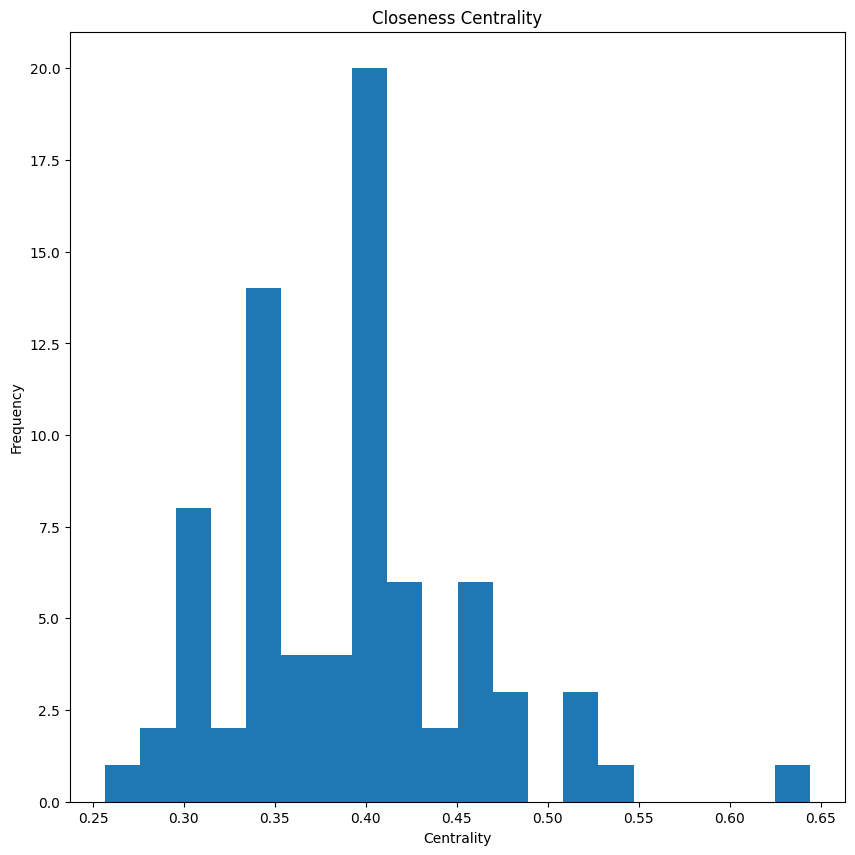

In [51]:
# Plot the closeness centrality of each node
plt.figure(figsize=(10, 10))
plt.hist(list(closeness_centrality.values()), bins=20)
plt.title('Closeness Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Calculate the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(G)

# Summarise the betweenness centrality
betweenness_centrality_df = pd.DataFrame(list(betweenness_centrality.items()), columns=['node', 'betweenness_centrality'])


print(betweenness_centrality_df.sort_values('betweenness_centrality', ascending=False))
print(betweenness_centrality_df.describe())

            node  betweenness_centrality
10       Valjean                0.569989
1         Myriel                0.176842
48      Gavroche                0.165113
55        Marius                0.132032
23       Fantine                0.129645
..           ...                     ...
36        Brevet                0.000000
37    Chenildieu                0.000000
40  Boulatruelle                0.000000
42       Anzelma                0.000000
76  MmeHucheloup                0.000000

[77 rows x 2 columns]
       betweenness_centrality
count               77.000000
mean                 0.021882
std                  0.072589
min                  0.000000
25%                  0.000000
50%                  0.000000
75%                  0.008041
max                  0.569989


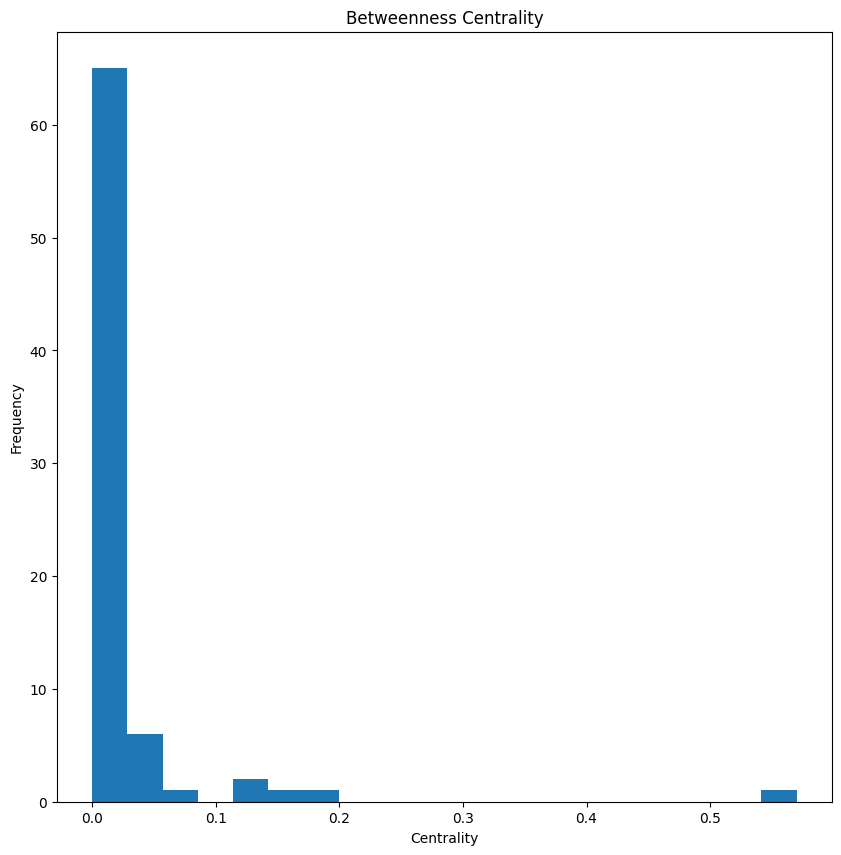

In [64]:
# Plot the betweenness centrality of each node
plt.figure(figsize=(10, 10))
plt.hist(list(betweenness_centrality.values()), bins=20)
plt.title('Betweenness Centrality')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

## Visualizing Centrality Measures and Looking for Patterns
This gives us a broad sense of the patterns here, but we may further be interested in particular persons. Who are the students who have the highest centrality measures? Are they high on multiple centrality measures? Which grade are they in? Where do they appear in the network? Are they clustered together? For many of these questions, a quick visualization of the network will help us start to answer some of these questions.

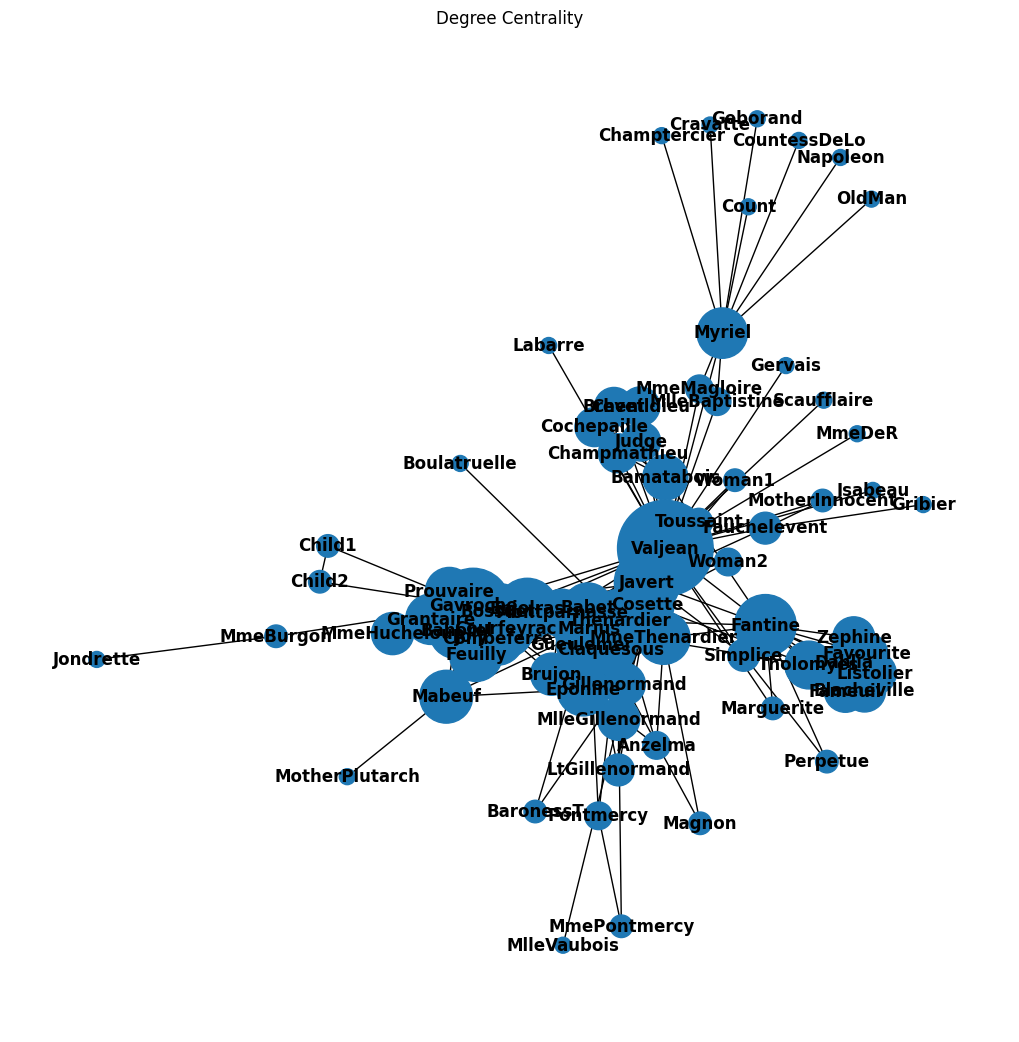

In [58]:
# Visualise degree centrality
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold', node_size=[v * 10000 for v in degree_centrality.values()])
plt.title('Degree Centrality')
plt.show()

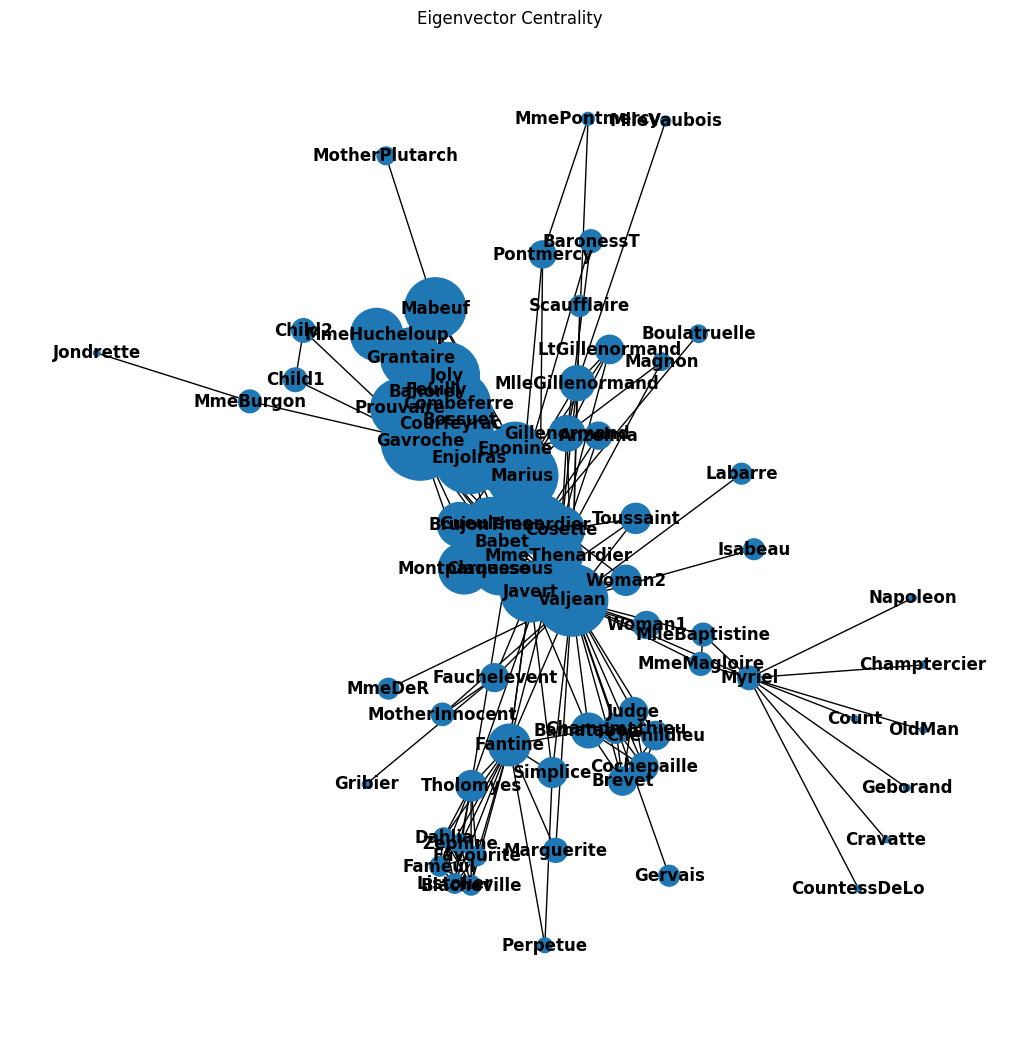

In [59]:
# Visualise eigenvector centrality
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold', node_size=[v * 10000 for v in eigenvector_centrality.values()])
plt.title('Eigenvector Centrality')
plt.show()

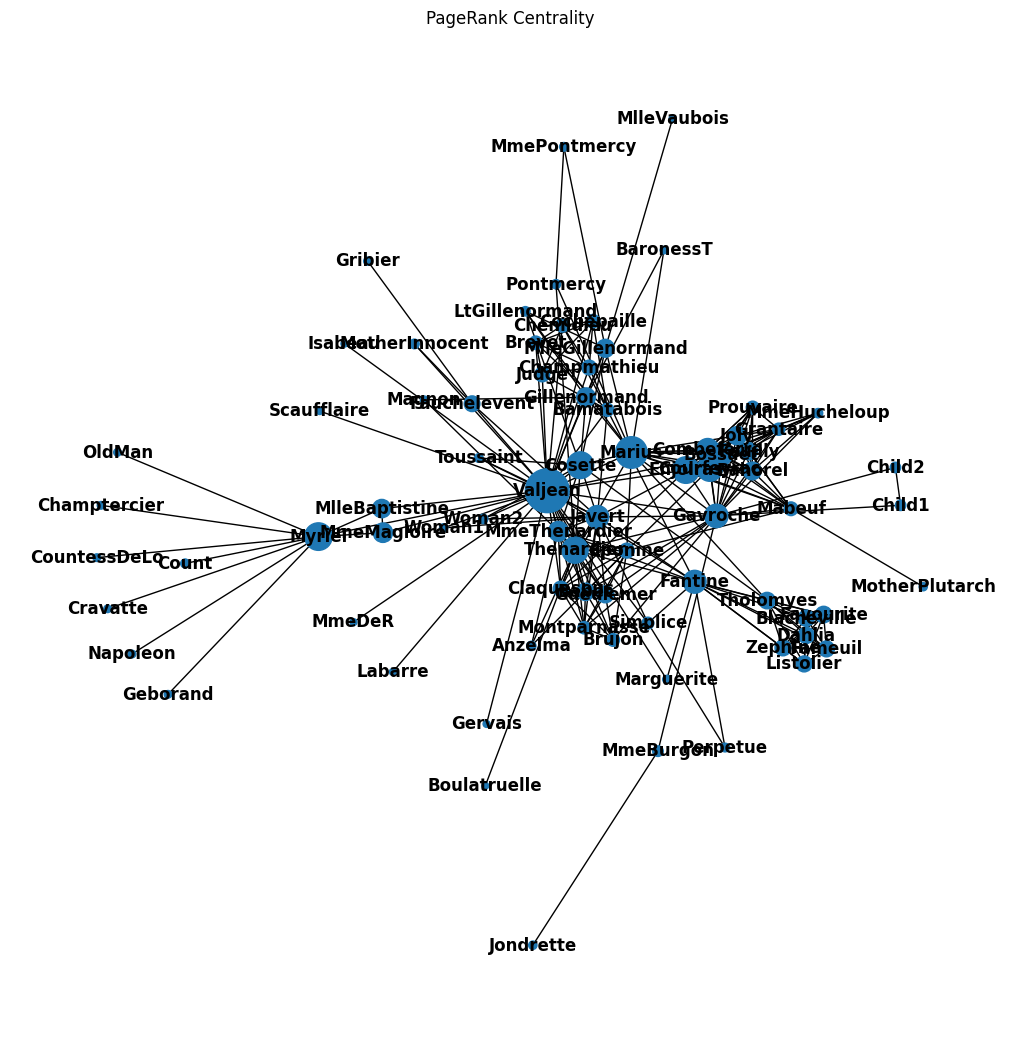

In [60]:
# Visualise PageRank centrality
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold', node_size=[v * 10000 for v in pagerank_centrality.values()])
plt.title('PageRank Centrality')
plt.show()

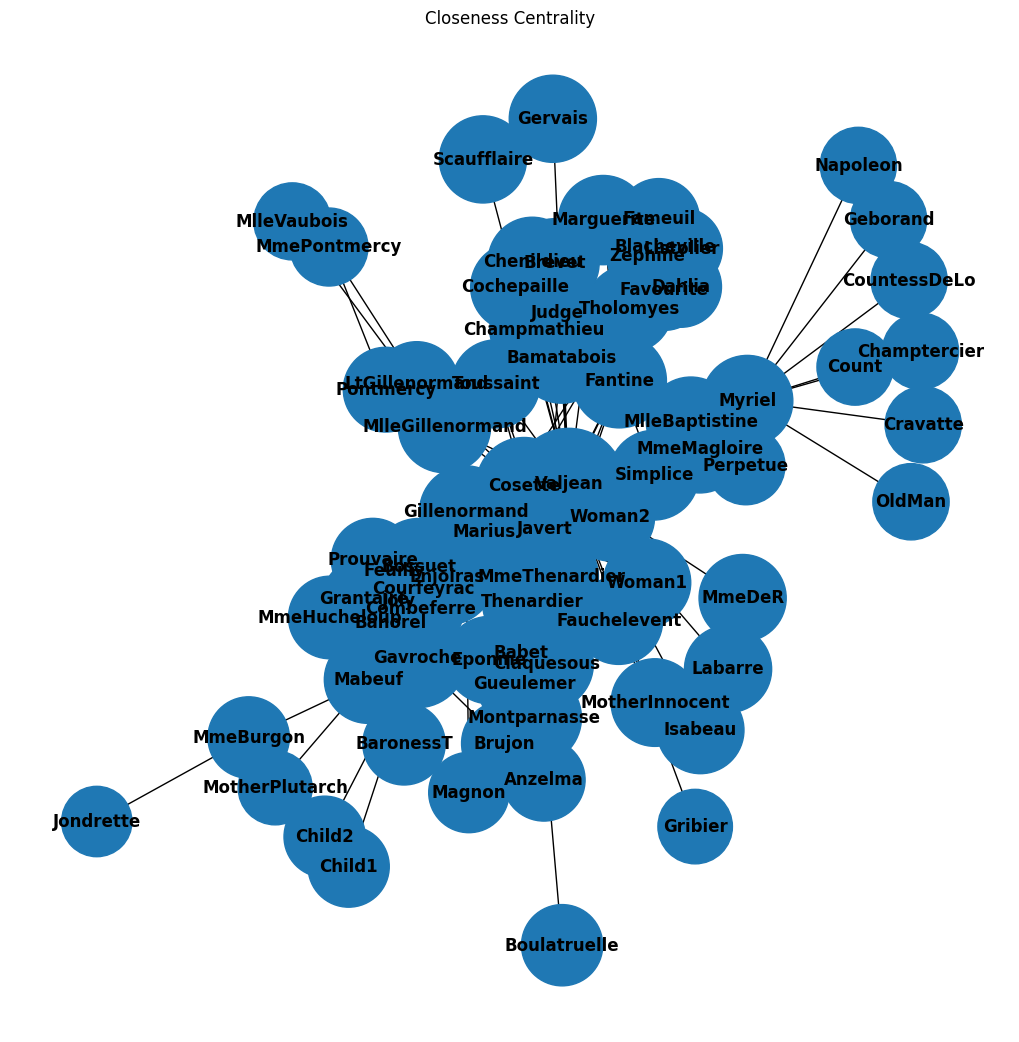

In [61]:
# Visualise closeness centrality
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold', node_size=[v * 10000 for v in closeness_centrality.values()])
plt.title('Closeness Centrality')
plt.show()

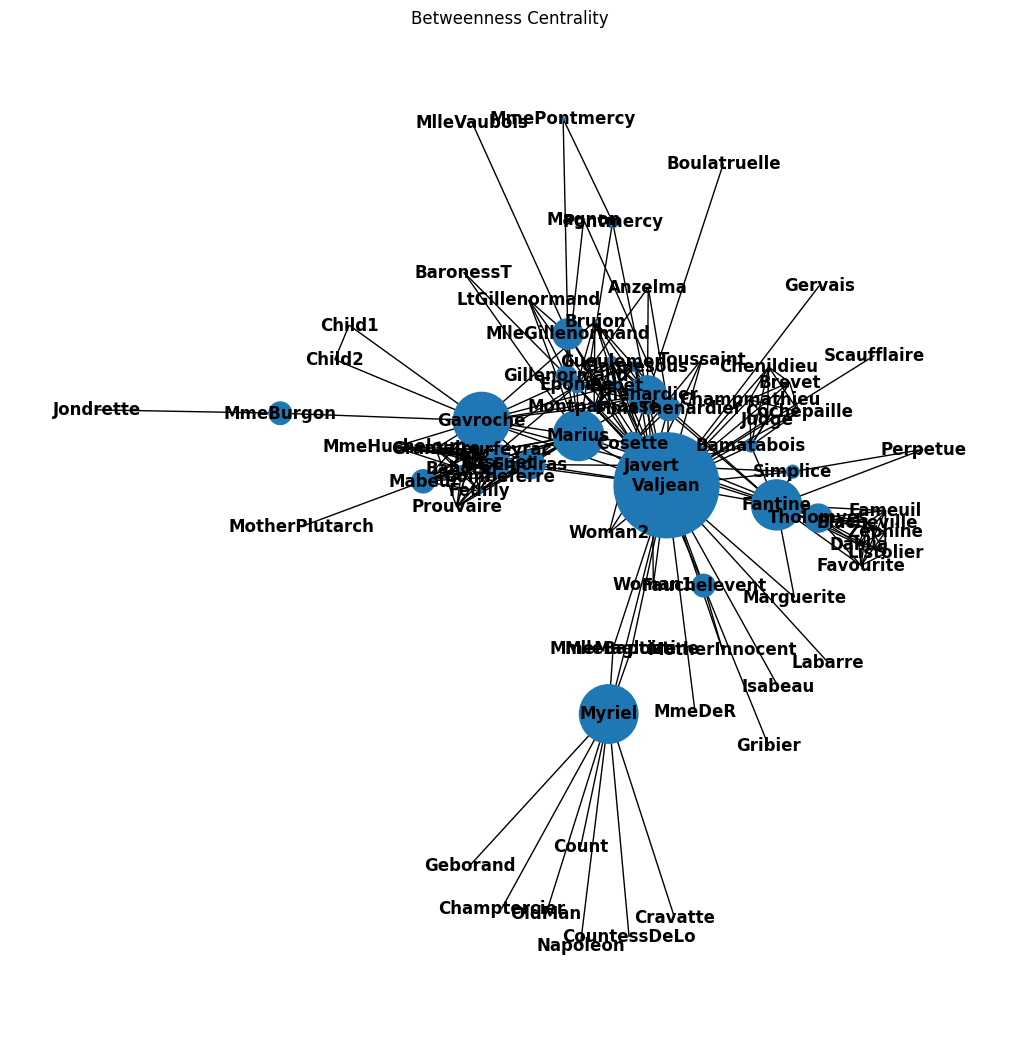

In [65]:
# Visualise betweenness centrality
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold', node_size=[v * 10000 for v in betweenness_centrality.values()])
plt.title('Betweenness Centrality')
plt.show()